In [ ]:
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
import cv2
from PIL import Image
import numpy as np

In [ ]:

# Load a pre-trained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [ ]:
# Load the image
image_path = "4.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
image_tensor = F.to_tensor(image).unsqueeze(0)  # Convert to tensor and add batch dimension



In [ ]:
# Perform prediction
with torch.no_grad():
    predictions = model(image_tensor)



In [ ]:
# Extract predicted masks, boxes, and labels
masks = predictions[0]['masks']
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']

# Threshold for filtering out low-confidence predictions
threshold = 0.5

# Convert the image to OpenCV format
image_np = np.array(image)
image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)



In [ ]:
# Iterate through the predicted masks and draw them on the image
for i in range(len(masks)):
    if scores[i] > threshold:
        mask = masks[i, 0].mul(255).byte().cpu().numpy()
        label = labels[i].item()
        box = boxes[i].cpu().numpy().astype(int)

        # Create a color overlay for the mask
        color = np.random.randint(0, 255, (3,), dtype=np.uint8)
        mask_colored = np.zeros_like(image_np, dtype=np.uint8)
        mask_colored[mask > 128] = color

        # Add mask to the image
        image_np = cv2.addWeighted(image_np, 1.0, mask_colored, 0.5, 0)

        # Draw the bounding box
        cv2.rectangle(image_np, (box[0], box[1]), (box[2], box[3]), color.tolist(), 2)
        cv2.putText(image_np, f"Label: {label}", (box[0], box[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color.tolist(), 2)



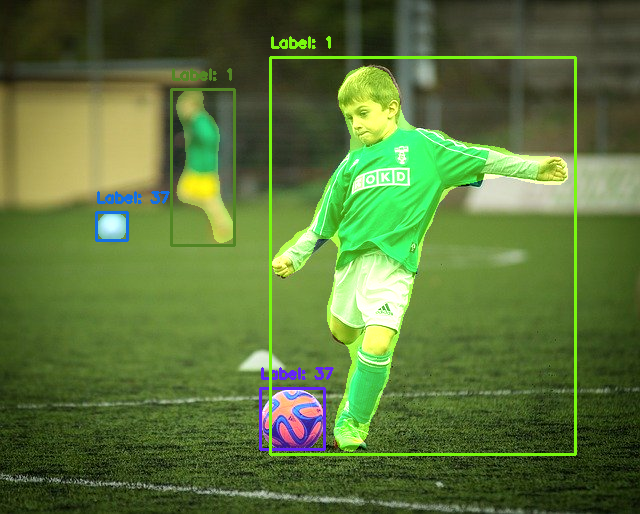

True

In [ ]:
# Display the image
from google.colab.patches import cv2_imshow # Import the Colab patch for cv2.imshow()
cv2_imshow(image_np) # Use cv2_imshow instead of cv2.imshow

cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the output image
cv2.imwrite("segmented_output.jpg", image_np)